In [29]:
%matplotlib ipympl
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.elements import element
from impedance.visualization import plot_nyquist, plot_bode
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import pandas as pd
from scipy import stats

In [30]:
@element(num_params=4, units=["Ohm","Ohm", "F", ""],overwrite=True)
def TLMuni(p, f):
    omega = 2 * np.pi * np.array(f)
    R, Rion, RionQ, alpha = p[0], p[1], p[2], p[3]
    S=RionQ*(1j*omega)**alpha
    Z= R+Rion*np.sqrt(1/(S))*(1/(np.tanh(np.sqrt(S))))
    return Z

@element(num_params=4, units=["Ohm","Ohm", "F", ""],overwrite=True)
def TLMuniEC(p, f):
    omega = 2 * np.pi * np.array(f)
    R, Rion, RionQ, alpha = p[0], p[1], p[2], p[3]
    S=(1j*omega*RionQ)**alpha
    Z= R+Rion*np.sqrt(1/S)*(1/(np.tanh(np.sqrt(S))))
    return Z

In [31]:
exp_data=pd.read_excel("abhi experimental through plane data.xlsx",header=None)
exp_data=exp_data.to_numpy()
z_exp_data=exp_data[:,1]+1j*exp_data[:,2]
freq_exp_data=exp_data[:,0]
#freq_exp_data

In [37]:
c_abhi_data=CustomCircuit(initial_guess=[41,1000,1,0.8],circuit="TLMuni")
c_EC=CustomCircuit(initial_guess=[40,530,1,0.9],circuit="TLMuniEC")
c_pred=c_abhi_data.fit(freq_exp_data,z_exp_data,bounds=[(0,0,0,0),(np.inf,np.inf,np.inf,1)])
c_pred_EC=c_EC.fit(freq_exp_data,z_exp_data,bounds=[(0,0,0,0),(np.inf,np.inf,np.inf,1)])

print(c_pred.parameters_)
print(c_pred_EC.parameters_)

[ 42.0062533  507.14126087   0.94465719   0.86405651]
[ 42.00625378 507.14125533   0.93623329   0.86405651]


C:\Users\admin\AppData\Local\Temp\ipykernel_59184\3644195306.py:6: RuntimeWarning: overflow encountered in tanh
  Z= R+Rion*np.sqrt(1/(S))*(1/(np.tanh(np.sqrt(S))))
C:\Users\admin\AppData\Local\Temp\ipykernel_59184\3644195306.py:14: RuntimeWarning: overflow encountered in tanh
  Z= R+Rion*np.sqrt(1/S)*(1/(np.tanh(np.sqrt(S))))


<Axes: xlabel='$Z^{\\prime}(\\omega)$ $[Ω]$', ylabel='$-Z^{\\prime\\prime}(\\omega)$ $[Ω]$'>

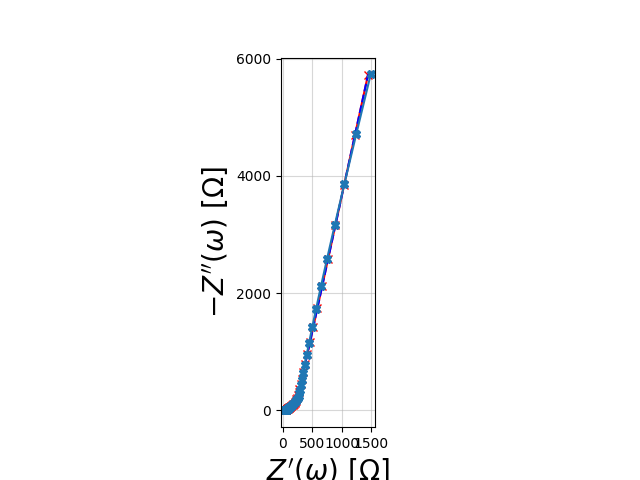

In [33]:

z_pred=c_pred.predict(freq_exp_data)
z_pred_EC=c_pred_EC.predict(freq_exp_data)
fg, ax=plt.subplots()
plot_nyquist(z_pred_EC,ax=ax,fmt="-x",color="red")
plot_nyquist(z_pred,ax=ax,fmt="--",color="blue")
plot_nyquist(z_exp_data,ax=ax,fmt="-X")
